# Assignment - Data Analysis with Pandas 


The `googleplaystore.csv` file in `data` folder gives the data on apps in **Google Play Store**.

#### Data Cleaning
---
* Convert columns `Reviews`, `Size`, `Installs` and `Price` to numeric values.
* Convert column `Last Updated` to datetime.
* Remove outlier(s) from `Rating` column.
* Save missing records to `"appstore-data-nan.csv"` file.
* Each app should have only 1 record in the dataframe. Remove duplicated records and keep only first one.
* Save final dataframe to `"appstore-data-cleaned.csv"` file.

#### Data Analysis
---
* Plot top 10 categories by app count of categories in a pie chart.
* Find the category with highest app count.
* Plot the average rating of categories as a bar chart.
* Find the category with the highest avg rating.
* Plot the ratings as histogram with bin size = 0.25.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/googleplaystore.csv')
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [3]:
print(df.shape)
df.info()

(10841, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Utility Functions

In [4]:
def clean_numeric_str(s):
    '''Takes string with M, k and + and convert it to numeric string'''
    if not isinstance(s, str):
        return s
    s = s.replace(',', '')
    if s.endswith('+'):
        s = s.rstrip('+')    
    elif s.endswith('M'):
        s = str(float(s.rstrip('M'))*1024*1024)
    elif s.endswith('k'):
        s = str(float(s.rstrip('k'))*1024)

    return s

In [5]:
def is_numeric(s):
    try:
        float(s)
    except:
        return False
    return True    

## Data Cleaning

Column `Reviews`, `Size`, `Installs` and `Price` can be numeric values.

#### Column Reviews 

In [6]:
df['Reviews'].unique()
non_numeric = ~df['Reviews'].apply(is_numeric)
non_numeric.sum()

1

In [7]:
df[non_numeric.values]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Column Size

In [9]:
df['Size'].unique()[:50]

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M'],
      dtype=object)

In [10]:
df['Size'] = df['Size'].apply(clean_numeric_str)
df['Size'].unique()
non_numeric = ~df['Size'].apply(is_numeric)
print(non_numeric.sum())
df[non_numeric]

1695


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639.0,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221.0,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057.0,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211.0,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356.0,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471.0,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8.0,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622.0,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486.0,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [11]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')
df['Size'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


#### Column Installs

In [12]:
df['Installs'].unique()[:50]

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [13]:
df['Installs'] = df['Installs'].apply(clean_numeric_str)
non_numeric = ~df['Installs'].apply(is_numeric)
print(non_numeric.sum())
df[non_numeric]

1


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,1000.0,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


#### Column Price

In [15]:
df['Price'].unique()[:50]

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49'], dtype=object)

In [16]:
df['Price'] = df['Price'].apply(lambda x: x.lstrip('$'))
non_numeric = ~df['Price'].apply(is_numeric)
print(non_numeric.sum())
df[non_numeric]

1


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,1000.0,NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


### Column Last Updated

In [18]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

In [19]:
df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                 float64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

### Missing Values

In [20]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              1
Size                 0
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

In [21]:
df[pd.isna(df['Android Ver'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230.0,11534336.0,1000.0,Paid,1.49,Everyone,Personalization,2018-07-20,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189.0,2202009.6,10000.0,Free,0.00,Everyone,Personalization,2018-03-27,1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,1000.0,NaN,0,NaN,NaN,"February 11, 2018",NaT,4.0 and up,NaN


### Outliers

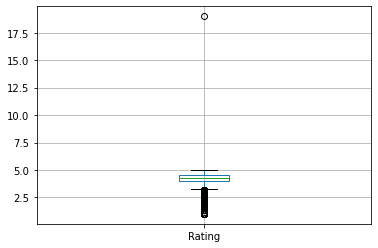

In [22]:
df[['Rating']].boxplot()

In [23]:
(df['Rating']>5).sum()

1

In [24]:
df[df['Rating']>5] = np.nan

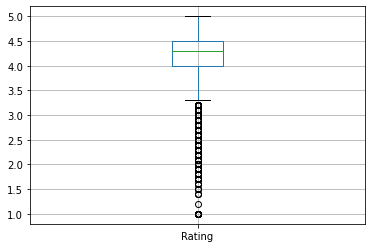

In [25]:
df[['Rating']].boxplot()

### Save Records with Missing Data

In [26]:
#save those records before dropping
df[df.isna().values].to_csv("appstore-data-nan.csv")

In [27]:
df.shape

(10841, 13)

In [28]:
df1 = df.dropna()

In [29]:
df1.shape

(9360, 13)

In [30]:
## clean the Rating colum
df["Rating"]= df.Rating.fillna(0)

In [31]:
df1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Duplicate Rows

List all duplicate rows and compare them manually. 

In [32]:
dup = df.duplicated(subset='App', keep=False)
duplicated_df = df[dup].sort_values('App')
duplicated_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3984588.8,500000.0,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3984588.8,500000.0,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,27262976.0,1000000.0,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,27262976.0,1000000.0,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,3984588.8,1000.0,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up


In [33]:
df.drop_duplicates(subset='App', keep='first', inplace=True)

In [34]:
df.duplicated(subset='App').any()

False

### Save Cleaned DataFrame to CSV

In [35]:
df.to_csv("appstore-data-cleaned.csv", index=False)

## 2. Data Analysis

In [40]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up


Plot the top 10 categories with most number of apps.

In [42]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

In [41]:
df['Category'].value_counts()[:10]

FAMILY             1832
GAME                959
TOOLS               827
BUSINESS            420
MEDICAL             395
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           369
FINANCE             345
SPORTS              325
Name: Category, dtype: int64

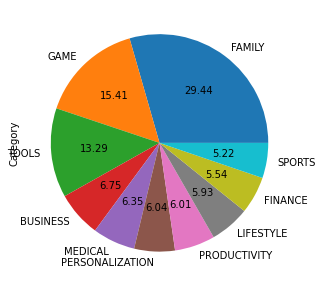

In [76]:
df['Category'].value_counts()[:10].plot(kind="pie", 
                            autopct='%.2f', figsize=(15,5))

Avg app rating for each category

In [55]:
s = pd.Series(np.random.randint(0,100,10))
pd.Series.*?

In [50]:
for k, v in df.groupby("Category"):
    print(k)
    print(v['Rating'])
    break

ART_AND_DESIGN
0       4.1
1       3.9
2       4.7
3       4.5
4       4.3
       ... 
7174    0.0
8679    4.2
8712    4.3
8871    0.0
8888    5.0
Name: Rating, Length: 64, dtype: float64


In [60]:
res = df.groupby("Category")['Rating'].agg(['mean', 'max', 'count'])
res

,mean,max,count
Category,,,
ART_AND_DESIGN,4.153125,5.0,64
AUTO_AND_VEHICLES,3.598824,4.9,85
BEAUTY,3.390566,4.9,53
BOOKS_AND_REFERENCE,3.307658,5.0,222
BUSINESS,2.566429,5.0,420
COMICS,4.032143,5.0,56
COMMUNICATION,3.349524,5.0,315
DATING,3.111111,5.0,171
EDUCATION,4.327731,4.9,119


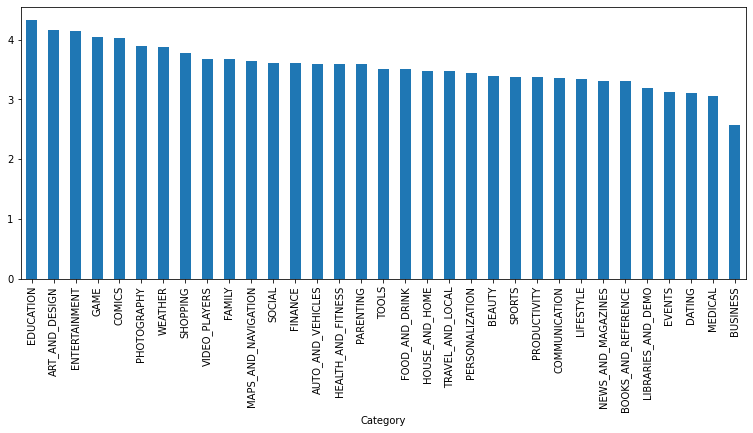

In [62]:
res.sort_values(by='mean',ascending=False, inplace=True)
res['mean'].plot(kind="bar", figsize=(13,5))

Plot the ratings as histogram with bin size = 0.25.

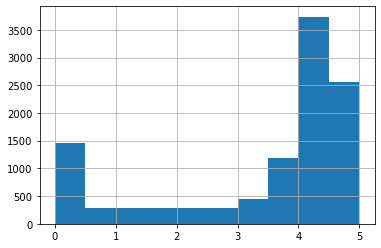

In [67]:
# df['Rating'].hist(bins=20)
df['Rating'].hist(bins= [0,0.5,3,3.5,4,4.5,5] )

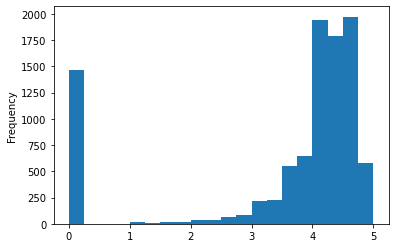

In [69]:
bins = np.arange(0,5.25,0.25)
bins
df['Rating'].plot(kind='hist', bins=bins)